In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.cm as cm
import cmocean.cm as cmo
import intake

In [2]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

client = Client(n_workers=50, threads_per_worker=1, memory_limit='5GB')

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 50
Total threads: 50,Total memory: 232.83 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39243,Workers: 50
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 50
Started: Just now,Total memory: 232.83 GiB
Comm: tcp://127.0.0.1:46559,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/35795/status,Memory: 4.66 GiB
Nanny: tcp://127.0.0.1:42639,


In [5]:
#OLD, not recomended way
# path_to_output = "/work/ab0995/a270088/NextGems_public/FESOM_interpolated/tco2559-ng5/MLD2/"
# json_file="MLD2.fesom.json"
# data = xr.open_zarr(f"reference::{path_to_output}/{json_file}", consolidated=False)

In [4]:
cat = intake.open_catalog("../catalog.yaml")
run = cat.FESOM["tco2559-ng5"]

In [9]:
data = run.interpolated_global2d.to_dask()

In [10]:
data

<xarray.Dataset>
Dimensions:    (time: 8328, depth: 1, lat: 2700, lon: 5400)
Coordinates:
  * depth      (depth) float64 0.0
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20T00:56:00 ... 2020-12-31T23:56:00
Data variables:
    MLD2       (time, depth, lat, lon) float32 dask.array<chunksize=(1, 1, 1350, 2700), meta=np.ndarray>
Attributes: (12/21)
    FESOM_ClimateDataPath:               /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_MeshPath:                      /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       469e74b1
    FESOM_include_fleapyear:             -1
    ...                                  ...
    FESOM_which_ALE:                     zstar
    box:                                 -180, 180, -90, 90
    data:                                /work/bm1235/a270046/cycle2-sync/tco...
    influence:                           80000
    interp:                              nn
    meshpath:                            /work/ab0995/a270088/meshes/NG5

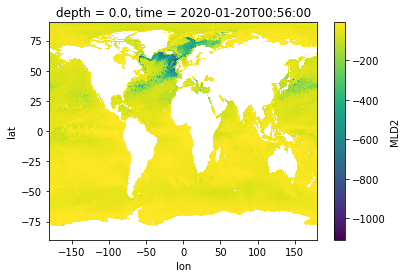

In [11]:
data['MLD2'][0,0,:,:].plot()

In [12]:
data['MLD2'].sel(time='2020-02')

<xarray.DataArray 'MLD2' (time: 696, depth: 1, lat: 2700, lon: 5400)>
dask.array<getitem, shape=(696, 1, 2700, 5400), dtype=float32, chunksize=(1, 1, 1350, 2700), chunktype=numpy.ndarray>
Coordinates:
  * depth      (depth) float64 0.0
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-02-01T00:56:00 ... 2020-02-29T23:56:00

In [13]:
mean_02 = data['MLD2'].sel(time='2020-02').mean(dim='time').compute()

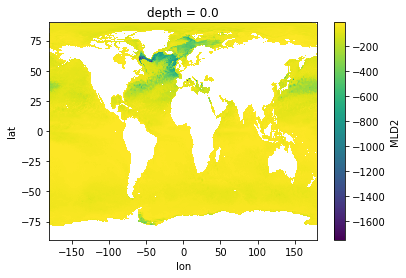

In [14]:
mean_02.plot()

In [15]:
# cat = intake.open_catalog("../catalog.yaml")
# run = cat.FESOM["tco2559-ng5"]
data3d = run.interpolated_global_TS.to_dask()

In [16]:
data3d

<xarray.Dataset>
Dimensions:    (time: 2776, depth: 21, lat: 2700, lon: 5400)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20T02:56:00 ... 2020-12-31T23:56:00
  * depth      (depth) float64 2.5 7.5 12.5 17.5 22.5 ... 87.5 92.5 97.5 105.0
  * lat        (lat) float64 -90.0 -89.93 -89.87 -89.8 ... 89.8 89.87 89.93 90.0
    latitude   (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
  * lon        (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    longitude  (time, lat, lon) float64 dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
Data variables:
    salt       (time, depth, lat, lon) float32 dask.array<chunksize=(1, 6, 900, 1800), meta=np.ndarray>
    temp       (time, depth, lat, lon) float32 dask.array<chunksize=(1, 6, 900, 1800), meta=np.ndarray>
Attributes: (12/21)
    FESOM_ClimateDataPath:               /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_MeshPath:                      /ec/res4/scratch/natr/RAPS/20/inputs...
    FESOM_evp_rheol_steps:               120
    FESOM_force_rotation:                -1
    FESOM_git_SHA:                       469e74b1
    FESOM_include_fleapyear:             -1
    ...                                  ...
    FESOM_which_ALE:                     zstar
    box:                                 -180, 180, -90, 90
    data:                                /work/bm1235/a270046/cycle2-sync/tco...
    influence:                           80000
    interp:                              nn
    meshpath:                            /work/ab0995/a270088/meshes/NG5

In [17]:
data3d.depth

<xarray.DataArray 'depth' (depth: 21)>
array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5,
        52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,  92.5,  97.5,
       105. ])
Coordinates:
  * depth    (depth) float64 2.5 7.5 12.5 17.5 22.5 ... 87.5 92.5 97.5 105.0

In [20]:
mean_3d_surface = data3d['temp'].sel(depth=17.5).sel(time='2020-02').mean(dim='time').compute()

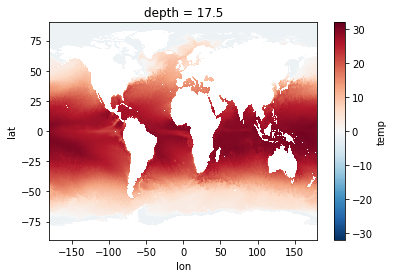

In [21]:
mean_3d_surface.plot()